In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [41]:
df_model = pd.read_csv("../inter_data/preprocessed.csv")
df_model = df_model[list(col for col in df_model.columns if "Unnam" not in col)]

In [49]:
cols = list(df_model.columns)
cols.remove("target")
df_model = pd.concat([df_model[cols], df_model[["target"]]], axis = 1)

In [50]:
df_model

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0,0.0
1,SIQBAL22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.000000,132.0,132.000000,132.000000,132.000000,39.0,5.82,0.0,47.0,1.0,NaN
2,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0,1.0
3,52093616,Y,0.0,M,1_5L,N,CAT,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0,1.0
4,SIG10103,Y,0.0,M,5_10L,N,Franchisee,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359242,PIDESHNA,Y,0.0,M,5_10L,N,Franchisee,36.0,132.000000,132.0,132.000000,132.000000,132.000000,0.0,1.46,1.0,0.0,1.0,NaN
359243,PRMA3411,N,0.0,M,5_10L,N,Premia,65.0,132.000000,132.0,132.000000,132.000000,132.000000,0.0,1.38,1.0,0.0,1.0,NaN
359244,PUND2371,Y,0.0,M,1_5L,N,CAT,26.0,0.155906,132.0,132.000000,132.000000,132.000000,0.0,101.39,1.0,20.0,1.0,NaN
359245,MMSM0103,N,0.0,M,5_10L,N,Franchisee,23.0,0.155906,132.0,132.000000,0.583019,0.418745,36600.0,3845.42,1.0,227.0,18.0,0.0


<AxesSubplot:>

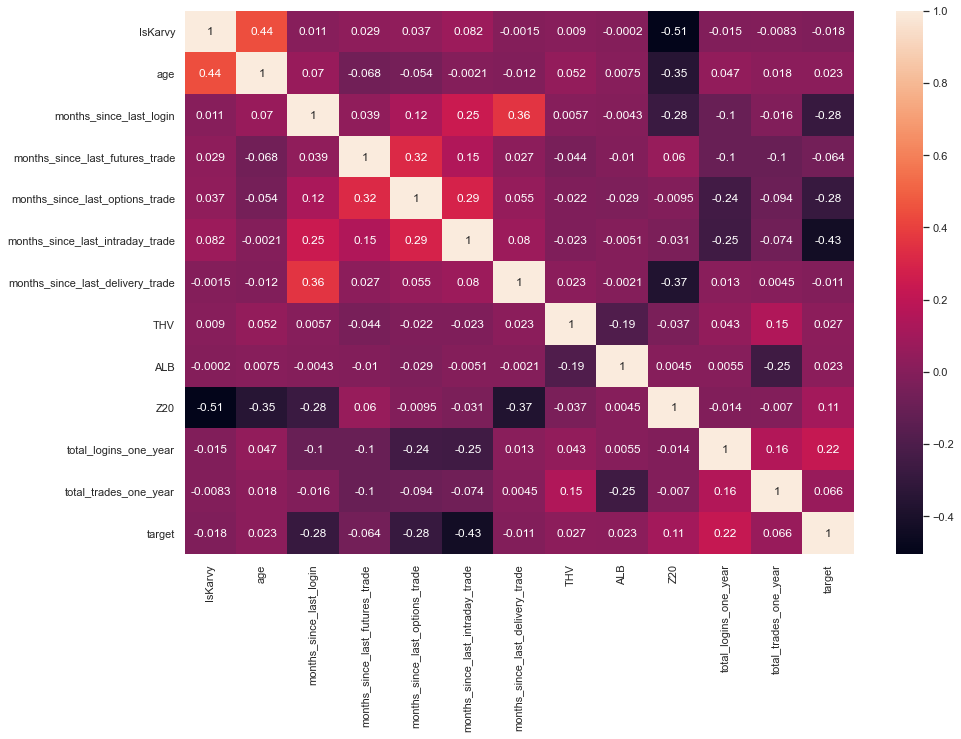

In [51]:
## checking correlation
sns.set(rc={'figure.figsize':(15,10)})

sns.heatmap(df_model.corr(), annot = True)

## handling null values

<AxesSubplot:>

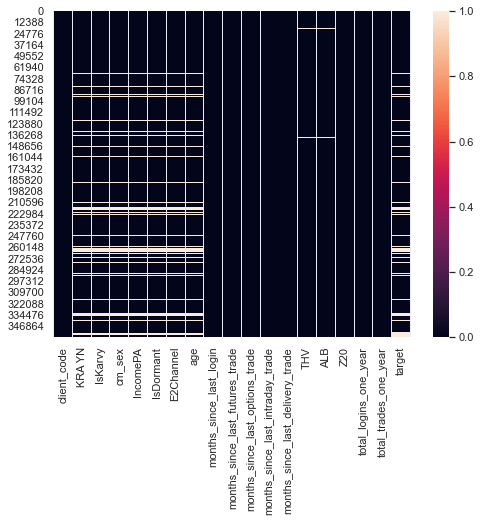

In [52]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df_model.isna())

In [53]:
df_model.isna().sum()

client_code                             0
KRA YN                              32949
IsKarvy                             32949
cm_sex                              32949
IncomePA                            33053
IsDormant                           32949
E2Channel                           33062
age                                 32949
months_since_last_login                 0
months_since_last_futures_trade         0
months_since_last_options_trade         0
months_since_last_intraday_trade        0
months_since_last_delivery_trade        0
THV                                   901
ALB                                   901
Z20                                     0
total_logins_one_year                   0
total_trades_one_year                   0
target                              37635
dtype: int64

In [57]:
df_model.shape

(359247, 19)

In [61]:
df_model = df_model.dropna()
df_model.shape

(320632, 19)

## feature engineering

## income column

In [67]:
df_model["IncomePA"] = df_model["IncomePA"].replace({"5_10L ??": "5_10L", 
                                        "<=1??": "<=1L", 
                                        "1_5??": "1_5L", "<= 1L": "<=1L"})

## E2Channel column

In [69]:
e2channels = list(df_model["E2Channel"].value_counts().index[:5])
df_model['E2Channel'].loc[~df_model['E2Channel'].isin(e2channels)] = 'otheras'

In [119]:
df_model.to_csv("../inter_data/processed_catboost.csv")

In [120]:
df_model

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0,0.0
2,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0,1.0
3,52093616,Y,0.0,M,1_5L,N,CAT,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0,1.0
4,SIG10103,Y,0.0,M,5_10L,N,Franchisee,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0,1.0
5,SANJU037,N,0.0,M,1_5L,N,GL Investments,32.0,0.287325,132.0,3.375684,3.441394,3.375684,0.0,-3.88,0.0,207.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359088,97284873,N,0.0,M,<=1L,N,CAT,26.0,5.544107,132.0,132.000000,5.938365,132.000000,0.0,1.83,1.0,31.0,7.0,0.0
359091,79307640,Y,0.0,M,5_10L,N,CAT,39.0,0.155906,132.0,132.000000,132.000000,0.484455,0.0,4505.90,1.0,356.0,4.0,0.0
359093,57268114,Y,0.0,M,5_10L,N,Franchisee,36.0,0.155906,132.0,132.000000,1.798650,1.404391,0.0,410.63,1.0,1625.0,125.0,0.0
359096,18895274,N,0.0,F,<=1L,N,CAT,26.0,0.550164,132.0,132.000000,4.098492,132.000000,0.0,2.43,1.0,76.0,3.0,0.0


In [122]:
df_model.head(2)

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.0,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0,0.0
2,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.0,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0,1.0


### encoding categorcial features

In [127]:
def feature_engineering(df):
   
    df = df.drop("client_code", axis = 1)
    # handing null values(continuos values)

    df["months_since_last_login"] = df["months_since_last_login"].fillna(df["months_since_last_login"].mean())
    df["months_since_last_futures_trade"] = df["months_since_last_futures_trade"].fillna(df["months_since_last_futures_trade"].mean())
    df["months_since_last_options_trade"] = df["months_since_last_options_trade"].fillna(df["months_since_last_options_trade"].mean())    
    df["months_since_last_intraday_trade"] = df["months_since_last_intraday_trade"].fillna(df["months_since_last_intraday_trade"].mean())    
    df["months_since_last_delivery_trade"] = df["months_since_last_delivery_trade"].fillna(df["months_since_last_delivery_trade"].mean())    
    df["THV"] = df["THV"].fillna(df["THV"].mean())        
    df["ALB"] = df["ALB"].fillna(df["ALB"].mean())        

     
    gender = ["M", "F", "O"]
    # categorical data
    df["KRA YN"] = df["KRA YN"].replace({"Y": 1, 
                                        "N": 0})
    df["KRA YN"] = df["KRA YN"].fillna(0)
    
    # IsDormat
    df["IsDormant"] = df["IsDormant"].replace({"Y": 1, 
                                        "N": 0})
    df["IsDormant"] = df["IsDormant"].fillna(0)
    
    e2channels = list(df["E2Channel"].value_counts().index[:5])
    df['E2Channel'].loc[~df['E2Channel'].isin(e2channels)] = 'others'
    
    income_slabs = list(df["IncomePA"].value_counts().index[:5])
    df["IncomePA"] = df_model["IncomePA"].replace({"5_10L ??": "5_10L", 
                                        "<=1??": "<=1L", 
                                        "1_5??": "1_5L", "<= 1L": "<=1L"})
    df['IncomePA'].loc[~df['IncomePA'].isin(income_slabs)] = 'others'

    df["IncomePA"] = df["IncomePA"].map({"others": 0, "<=1L": 1, "1lakh": 2, "1_2L": 3, "1_5L": 3,"2_5L": 3, ">5L": 4, "5_10L": 4, "10_25L": 5, ">25:": 6})
    
    df['cm_sex'].loc[~df['cm_sex'].isin(gender)] = 'O'
    df['IsKarvy'] = df['IsKarvy'].fillna(0)
    
    
    numerical_cols = [col for col in df.columns if (("THV" in col) or ("ALB" in col) or ("month" in col))]  
    df["IncomePA"] = df["IncomePA"].fillna(0)
    # creating dummy for categorical data
    dummy1 = pd.get_dummies(df[["E2Channel", "cm_sex"]], drop_first=True)
    df = pd.concat([df, dummy1], axis=1)
    df = df.drop(["E2Channel", "cm_sex"], axis = 1)
   
   
    # scaling numerical columns
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()

    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df


In [128]:
df_model_encoded = feature_engineering(df_model)

In [129]:
df_model_encoded

,KRA YN,IsKarvy,IncomePA,IsDormant,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target,E2Channel_Franchisee,E2Channel_GL Investments,E2Channel_Premia,E2Channel_others,cm_sex_M,cm_sex_O
0,1,0.0,4,0,34.0,1.452002,0.088969,0.189797,0.359794,0.253741,-0.031942,-0.013021,1.0,0.0,1.0,0.0,1,0,0,0,1,0
2,1,0.0,4,0,25.0,-0.717251,0.088969,0.189797,-2.957687,0.192960,-0.031942,-0.012991,1.0,266.0,36.0,1.0,1,0,0,0,1,0
3,1,0.0,3,0,46.0,-0.718333,0.088969,0.189797,-3.010910,-0.183881,-0.011682,0.025514,1.0,493.0,131.0,1.0,0,0,0,0,1,0
4,1,0.0,4,0,36.0,-0.716170,0.088969,-5.674180,0.359794,0.055190,-0.021170,-0.013021,1.0,282.0,52.0,1.0,1,0,0,0,1,0
5,0,0.0,3,0,32.0,-0.716170,0.088969,-5.591483,-2.945860,0.213220,-0.031942,-0.013043,0.0,207.0,7.0,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359088,0,0.0,1,0,26.0,-0.629636,0.088969,0.189797,-2.881655,16.076683,-0.031942,-0.013012,1.0,31.0,7.0,0.0,0,0,0,0,1,0
359091,1,0.0,4,0,39.0,-0.718333,0.088969,0.189797,0.359794,-0.143360,-0.031942,0.011047,1.0,356.0,4.0,0.0,0,0,0,0,1,0
359093,1,0.0,4,0,36.0,-0.718333,0.088969,0.189797,-2.988100,-0.029903,-0.031942,-0.010828,1.0,1625.0,125.0,0.0,1,0,0,0,1,0
359096,0,0.0,1,0,26.0,-0.711843,0.088969,0.189797,-2.928964,16.076683,-0.031942,-0.013009,1.0,76.0,3.0,0.0,0,0,0,0,0,0


In [130]:
df_model_encoded.to_csv("../inter_data/processed_encoded.csv")

## model Training

In [77]:
X = df_model.drop("target", axis=1)
y = df_model["target"]

In [78]:
df_model.describe()

,IsKarvy,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
count,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,3.206320e+05,3.206320e+05,320632.000000,320632.000000,320632.000000,320632.000000
mean,0.114268,33.562748,43.793382,131.223284,127.777326,118.007426,1.646849,4.356717e+04,2.437778e+03,0.727077,78.522381,22.725271,0.160692
std,0.318137,13.377126,60.748354,8.730243,22.248449,38.890579,8.108225,1.363942e+06,1.872078e+05,0.445463,413.337638,642.720854,0.367247
min,0.000000,0.000000,0.155906,0.155906,0.155906,0.155906,0.155906,0.000000e+00,-7.320931e+07,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.254470,132.000000,132.000000,132.000000,0.583019,0.000000e+00,1.800000e-01,0.000000,0.000000,1.000000,0.000000
50%,0.000000,30.000000,1.404391,132.000000,132.000000,132.000000,1.075843,0.000000e+00,7.700000e-01,1.000000,5.000000,1.000000,0.000000
75%,0.000000,40.000000,132.000000,132.000000,132.000000,132.000000,1.601521,0.000000e+00,2.100000e+00,1.000000,27.000000,1.000000,0.000000
max,1.000000,121.000000,132.000000,132.823928,132.856783,133.053912,132.000000,3.419104e+08,5.030694e+07,1.000000,30177.000000,183339.000000,1.000000


In [79]:
pd.DataFrame(df_model.nunique()).rename(columns = {0: "num_unique"})

,num_unique
client_code,320632
KRA YN,2
IsKarvy,2
cm_sex,5
IncomePA,8
IsDormant,2
E2Channel,6
age,103
months_since_last_login,1903
months_since_last_futures_trade,1721


In [80]:
X

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0
2,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0
3,52093616,Y,0.0,M,1_5L,N,CAT,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0
4,SIG10103,Y,0.0,M,5_10L,N,Franchisee,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0
5,SANJU037,N,0.0,M,1_5L,N,GL Investments,32.0,0.287325,132.0,3.375684,3.441394,3.375684,0.0,-3.88,0.0,207.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359088,97284873,N,0.0,M,<=1L,N,CAT,26.0,5.544107,132.0,132.000000,5.938365,132.000000,0.0,1.83,1.0,31.0,7.0
359091,79307640,Y,0.0,M,5_10L,N,CAT,39.0,0.155906,132.0,132.000000,132.000000,0.484455,0.0,4505.90,1.0,356.0,4.0
359093,57268114,Y,0.0,M,5_10L,N,Franchisee,36.0,0.155906,132.0,132.000000,1.798650,1.404391,0.0,410.63,1.0,1625.0,125.0
359096,18895274,N,0.0,F,<=1L,N,CAT,26.0,0.550164,132.0,132.000000,4.098492,132.000000,0.0,2.43,1.0,76.0,3.0


### Catboost

In [81]:
# declaring categorical features for catboost model
cat_features = ["KRA YN", "IsKarvy", "cm_sex", "IncomePA", "IsDormant", "E2Channel", "Z20"]


In [82]:
# removing client_code
X = X.drop("client_code", axis = 1)

In [93]:
X["IsKarvy"] = X["IsKarvy"].astype(int)
X["Z20"] = X["Z20"].astype(int)

In [94]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_xtest_split(X, y, test_size=0.2, random_state=0)

In [95]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [96]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 0.3734279	test: 0.3743849	best: 0.3743849 (0)	total: 35ms	remaining: 315ms
1:	learn: 0.2524505	test: 0.2537676	best: 0.2537676 (1)	total: 58.4ms	remaining: 234ms
2:	learn: 0.1912978	test: 0.1928117	best: 0.1928117 (2)	total: 84.7ms	remaining: 198ms
3:	learn: 0.1563138	test: 0.1578108	best: 0.1578108 (3)	total: 107ms	remaining: 160ms
4:	learn: 0.1355782	test: 0.1371262	best: 0.1371262 (4)	total: 130ms	remaining: 130ms
5:	learn: 0.1212321	test: 0.1226232	best: 0.1226232 (5)	total: 151ms	remaining: 101ms
6:	learn: 0.1128120	test: 0.1144332	best: 0.1144332 (6)	total: 172ms	remaining: 73.8ms
7:	learn: 0.1080220	test: 0.1097652	best: 0.1097652 (7)	total: 197ms	remaining: 49.2ms
8:	learn: 0.1043367	test: 0.1059060	best: 0.1059060 (8)	total: 219ms	remaining: 24.4ms
9:	learn: 0.1026418	test: 0.1041711	best: 0.1041711 (9)	total: 241ms	remaining: 0us

bestTest = 0.1041710778
bestIteration = 9



In [118]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'Recall']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [114]:
y_train_pred = clf.predict(X_train)
train_result = pd.DataFrame({'Converted':y_train, 'Converted_prob':y_train_pred, "prospect_ID": y_train.index})

Text(0.5, 0, 'False Positive Rate')

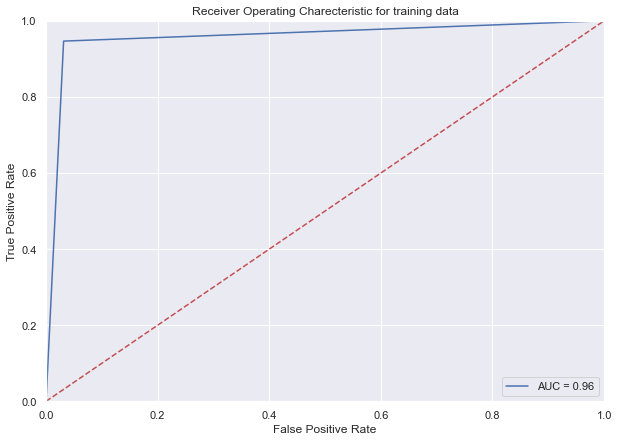

In [115]:
import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

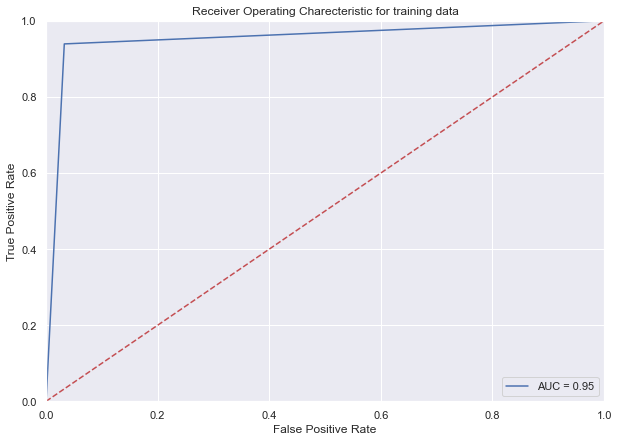

In [117]:
y_val_pred = clf.predict(X_val)
val_result = pd.DataFrame({'Converted':y_val, 'Converted_prob':y_val_pred, "prospect_ID": y_val.index})

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')